<a href="https://colab.research.google.com/github/Garvit-Kr/Deep_L/blob/main/MoreOnData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

dataset loader

In [ ]:
# create some data in numpy

nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations,nFeatures)

In [ ]:
# Convert to pytorch tensor
dataT = torch.tensor( data )

# print out some information
print('Numpy data:')
print(type(data))
print(data.shape) # numpy -> .shape
print(data.dtype)
print(' ')

print('Tensor data:')
print(type(dataT))
print(dataT.size()) # torch -> .size()
print(dataT.dtype)
print(' ')

Numpy data:
<class 'numpy.ndarray'>
(100, 20)
float64
 
Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
torch.float64
 


In [ ]:
# Sometimes you need to convert data types

dataT2 = torch.tensor( data ).float()
print(dataT2.dtype)

# "long" is for ints
dataT3 = torch.tensor( data ).long()
print(dataT3.dtype)

torch.float32
torch.int64


In [ ]:
# Convert tensor into PyTorch Datasets

# dataset = TensorDataset(data) # not a tensor!
dataset = TensorDataset(dataT)

# dataset is a two-element tuple comprising data,labels
dataset.tensors[0]

tensor([[-1.0066,  0.5183, -1.3999,  ...,  0.5050, -0.3907,  0.1181],
        [ 1.2707, -1.3082, -1.6428,  ..., -1.3308,  2.0264, -0.1758],
        [ 1.0219, -1.2686,  1.6161,  ..., -0.9731, -0.2422,  0.0140],
        ...,
        [-0.4000,  0.6600, -0.9700,  ..., -0.5604, -0.5746, -0.9006],
        [ 0.9153, -0.4013,  0.6872,  ..., -0.0159, -0.9552, -0.7742],
        [-0.2237, -0.0386,  1.8696,  ..., -0.4685,  0.4302, -2.0349]],
       dtype=torch.float64)

In [ ]:
# Let's try again with labels
labels = torch.ceil(torch.linspace(.01,4,nObservations))

# transform to an actual matrix (column vector)
labels = labels.reshape(( len(labels),1 ))
# print( labels )

# now make another dataset
dataset = TensorDataset(dataT,labels)
print( dataset.tensors[0].size() )
print( dataset.tensors[1].size() )

# for comparison
print( np.shape(np.random.randint(5,size=nObservations)) )

torch.Size([100, 20])
torch.Size([100, 1])
(100,)


In [ ]:
# create a dataloader object
batchsize = 25
dataloader = DataLoader(dataset,batch_size=batchsize)#,shuffle=True,drop_last=True)

dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [ ]:
# sizes of each batch
for dat,labs in dataloader:
  print('BATCH INFO:')
  print(dat.size())
  print(labs.size())
  print(' ')

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 


In [ ]:
# inspect the labels
for dat,labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 


In [ ]:
# try again with shuffling (shuffling happens during iterations)
# dataloader = DataLoader(dataset,batch_size=batchsize,shuffle=True)

for dat,labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 


In [ ]:
# To get only one batch (e.g., for testing)

dat,labs = next(iter(dataloader))

labs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

depth vs wide data

In [ ]:
# a function that creates data

def createSomeData(nPerClust):

  A = [ 1, 1 ]
  B = [ 5, 1 ]
  C = [ 4, 4 ]

  # generate data
  a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
  b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]
  c = [ C[0]+np.random.randn(nPerClust) , C[1]+np.random.randn(nPerClust) ]

  # true labels
  labels_np = np.hstack(( np.zeros((nPerClust)),
                          np.ones( (nPerClust)),
                        1+np.ones( (nPerClust))  ))

  # concatanate into a matrix, then convert to a pytorch tensor
  data_np = np.hstack((a,b,c)).T

  # NEW: put all outputs into a dictionary
  output = {}
  output['data'] = torch.tensor(data_np).float()
  output['labels'] = torch.tensor(labels_np).long() # note: "long" format (integers) for labels

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(output['data'], output['labels'], train_size=.9)

  # then convert them into PyTorch Datasets (note: already converted to tensors)
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # finally, translate into dataloader objects
  batchsize  = 8
  output['train_data'] = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  output['test_data']  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return output

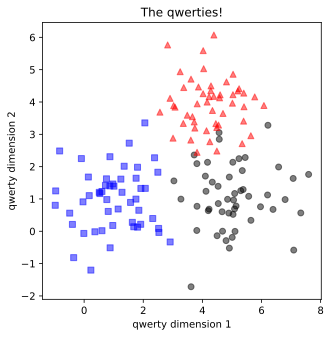

In [ ]:
# Check that the function works

theData = createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# create a class for the model
def createTheQwertyNet(nUnits,nLayers):

  class qwertyNet(nn.Module):
    def __init__(self,nUnits,nLayers):
      super().__init__()

      # create dictionary to store the layers
      self.layers = nn.ModuleDict()
      self.nLayers = nLayers

      ### input layer
      self.layers['input'] = nn.Linear(2,nUnits)

      ### hidden layers
      for i in range(1,nLayers):
        self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

      ### output layer
      self.layers['output'] = nn.Linear(nUnits,3)


    # forward pass
    def forward(self,x):
      # input layer
      x = F.relu( self.layers['input'](x) )

      # hidden layers
      for i in range(1,self.nLayers):
        x = F.relu( self.layers[f'hidden{i}'](x) )

      # return output layer
      x = self.layers['output'](x)
      return x

  # create the model instance
  net = qwertyNet(nUnits,nLayers)

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
# test the model with fake input

nUnitsPerLayer = 12
nLayers = 4

net,lossf,opt = createTheQwertyNet(nUnitsPerLayer,nLayers)
print(net)

# input is ten samples
input = torch.rand(10,2)
net(input)

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[ 0.1726,  0.0880, -0.1829],
        [ 0.1649,  0.0920, -0.1778],
        [ 0.1737,  0.0974, -0.1838],
        [ 0.1748,  0.0907, -0.1853],
        [ 0.1692,  0.0912, -0.1795],
        [ 0.1698,  0.0934, -0.1810],
        [ 0.1678,  0.0960, -0.1807],
        [ 0.1707,  0.1002, -0.1820],
        [ 0.1729,  0.0950, -0.1840],
        [ 0.1688,  0.0895, -0.1791]], grad_fn=<AddmmBackward0>)

In [ ]:
# a function to count the number of units
def count_units(model):
  total_units = 0
  for layer in model.modules():
    if isinstance(layer, torch.nn.modules.linear.Linear):
      total_units += layer.in_features
  return total_units


nNodesInModel = 80
layersRange   = [ 1,5,10,20 ]

# print out the model architectures
for lidx,layers in enumerate(layersRange):

  # create a model
  unitsperlayer = int(nNodesInModel//layersRange[lidx])
  net = createTheQwertyNet(unitsperlayer,layers)[0]

  # count and print the results
  print(f'Units/layer: {unitsperlayer}, layers: {layers}, Total count: {count_units(net)}')

Units/layer: 80, layers: 1, Total count: 82
Units/layer: 16, layers: 5, Total count: 82
Units/layer: 8, layers: 10, Total count: 82
Units/layer: 4, layers: 20, Total count: 82


In [ ]:
def function2trainTheModel(nUnits,nLayers):

  # number of epochs
  numepochs = 50

  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(nUnits,nLayers)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_data:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_data)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


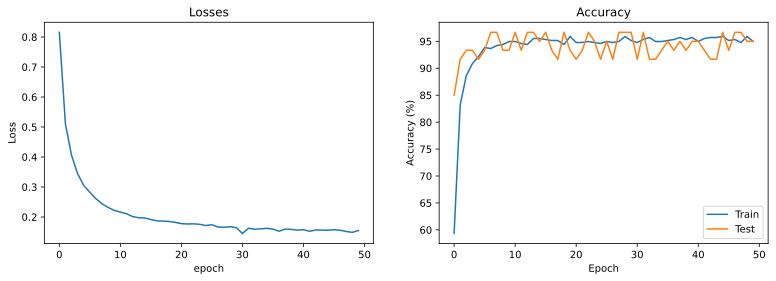

In [ ]:
### Test the model once with a bit of data, just to make sure the code works.

# generate the data
theData = createSomeData(200)
train_data = theData['train_data']
test_data  = theData['test_data']

# run the model
trainAcc,testAcc,losses,net = function2trainTheModel(80,1)



# show the results!
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

In [ ]:
# before the experiment, configure and confirm the metaparameters

# specify the parameters for the model
nNodesInModel = 80
layersRange   = [ 1,5,10,20 ]
nDatapoints   = np.arange(50,551,50)

# create a legend for later plotting
legend = []

# print out the model architectures
for lidx,layers in enumerate(layersRange):

  # create a model
  unitsperlayer = int(nNodesInModel/layersRange[lidx])
  net = createTheQwertyNet(unitsperlayer,layers)[0]

  # count its parameters (see lecture ANNs:Depth vs. breadth)
  nparams = np.sum([ p.numel() for p in net.parameters() if p.requires_grad ])

  legend.append( '%s layers, %s units, %s params' %(layers,unitsperlayer,nparams) )
  print('This model will have %s layers, each with %s units, totalling %s parameters' %(layers,unitsperlayer,nparams))

This model will have 1 layers, each with 80 units, totalling 483 parameters
This model will have 5 layers, each with 16 units, totalling 1187 parameters
This model will have 10 layers, each with 8 units, totalling 699 parameters
This model will have 20 layers, each with 4 units, totalling 407 parameters


In [ ]:
# note: takes ~5 mins

# initialize results matrix
results = np.zeros((len(nDatapoints),len(layersRange),2))

for didx,pnts in enumerate(nDatapoints):

  # create data (note: same data for each layer manipulation!)
  theData = createSomeData(pnts)
  train_data = theData['train_data']
  test_data  = theData['test_data']


  # now loop over layers
  for lidx,layers in enumerate(layersRange):

    unitsperlayer = int(nNodesInModel/layersRange[lidx])
    trainAcc,testAcc,losses,net = function2trainTheModel(unitsperlayer,layers)

    # average of last 5 accuracies and losses
    results[didx,lidx,0] = np.mean( testAcc[-5:] )
    results[didx,lidx,1] = torch.mean(losses[-5:]).item()


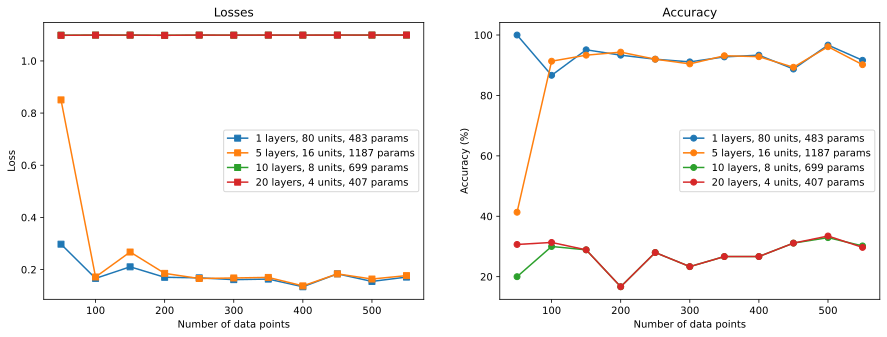

In [ ]:
# show the results!

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(nDatapoints,results[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDatapoints,results[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()


In [ ]:
# Interpretation:
#   Learning depends more on the architecture and the nature of the problem, than on the number of parameters.

In [ ]:
# Strategies for dealing with unbalanced data
'''
 -- Get more data. The best solution, but not always possible.
 -- Undersample. Throw out lots of data to match sample sizes. Not really the best idea, unless you have a lot of data to work with.
 -- Oversample. Create multiple copies of the rare data. Increases risk of overfitting
 -- Data augmentation. Add new features as nonlinear transformations of existing data. Usually feasible for images.
 -- Create synthetic samples. Can be good if the fake data look like real data. SMOTE: synthetic minority oversampling technique.
 -- Consider whether a non-DL solution would be better...
'''

DATA OVERSAMPLING

In [ ]:
# a function that return a dataset with specified size

# import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')


# now for the function
def makeTheDataset(N,doubleTheData=False):

  # extract labels (number IDs) and remove from data
  labels = dataFull[:N,0]
  data   = dataFull[:N,1:]

  # normalize the data to a range of [0 1]
  dataNorm = data / np.max(data)


  # # make an exact copy of ALL the data
  # if doubleTheData:
  #   dataNorm = np.concatenate((dataNorm,dataNorm),axis=0)
  #   labels   = np.concatenate((labels,labels),axis=0)


  # convert to tensor
  dataT   = torch.tensor( dataNorm ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, train_size=.9)



  # make an exact copy of the TRAIN data
  if doubleTheData:
    train_data   = torch.cat((train_data,train_data),axis=0)
    train_labels = torch.cat((train_labels,train_labels),axis=0)


  # convert into PyTorch Datasets
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # translate into dataloader objects
  batchsize    = 20
  train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return train_loader,test_loader

In [ ]:
# Check the sizes
r,t = makeTheDataset(200,False)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

r,t = makeTheDataset(200,True)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([180, 784])
torch.Size([20, 784])
torch.Size([360, 784])
torch.Size([20, 784])


In [ ]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

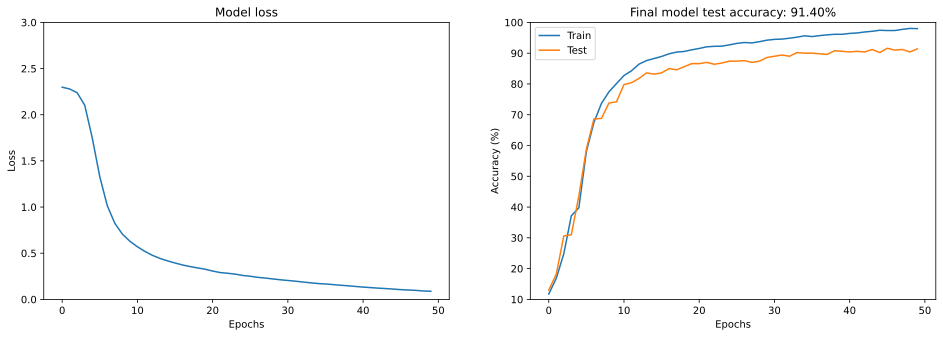

In [ ]:
# generate a dataset
train_loader,test_loader = makeTheDataset(5000)

# test it
trainAcc,testAcc,losses,net = function2trainTheModel()



# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [ ]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,False)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(testAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,True)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(testAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


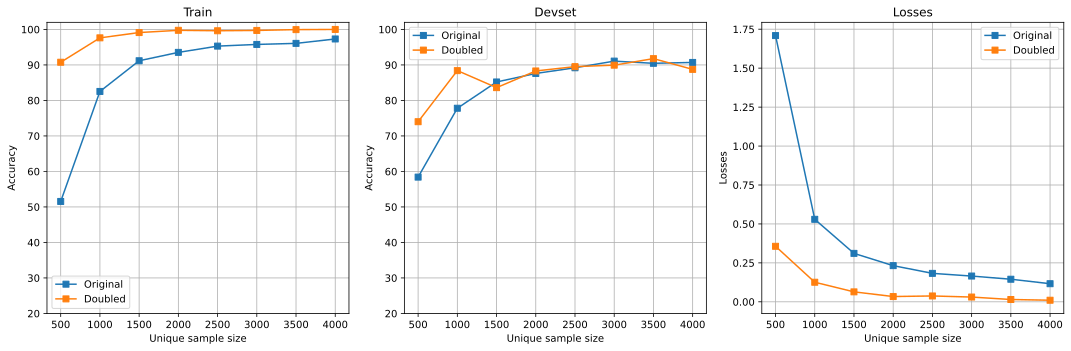

In [ ]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')

  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

NOISE AUGMENTATION (IN IMAGE)

In [ ]:
# import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# normalize the data to a range of [0 1]
dataFull[:,1:] = dataFull[:,1:] / np.max(dataFull)


# now for the function
def makeTheDataset(N,doubleTheData=False):

  # extract labels (number IDs) and remove from data
  data   = dataFull[:N,1:]
  labels = dataFull[:N,0]


  # make a noisy copy of ALL the data
  if doubleTheData:
    dataN  = data + np.random.random_sample(data.shape)/2
    data   = np.concatenate((data,dataN),axis=0)
    labels = np.concatenate((labels,labels),axis=0)


  # convert to tensor
  dataT   = torch.tensor( data   ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data
  train_data,devset_data, train_labels,devset_labels = train_test_split(dataT, labelsT, train_size=.9)


  # # make a noisy copy of the TRAIN data
  # if doubleTheData:
  #   train_dataN  = train_data + torch.rand_like(train_data)/2
  #   train_data   = torch.cat((train_data,train_dataN),axis=0)
  #   train_labels = torch.cat((train_labels,train_labels),axis=0)


  # convert into PyTorch Datasets
  train_data  = TensorDataset(train_data,train_labels)
  devset_data = TensorDataset(devset_data,devset_labels)

  # translate into dataloader objects
  batchsize     = 20
  train_loader  = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  devset_loader = DataLoader(devset_data,batch_size=devset_data.tensors[0].shape[0])



  # NEW!! Create a test set (don't need a dataloader)
  testdata   = torch.tensor( dataFull[N:,1:] ).float()
  testlabels = torch.tensor( dataFull[N:,0]  ).long()

  return train_loader,devset_loader,(testdata,testlabels)

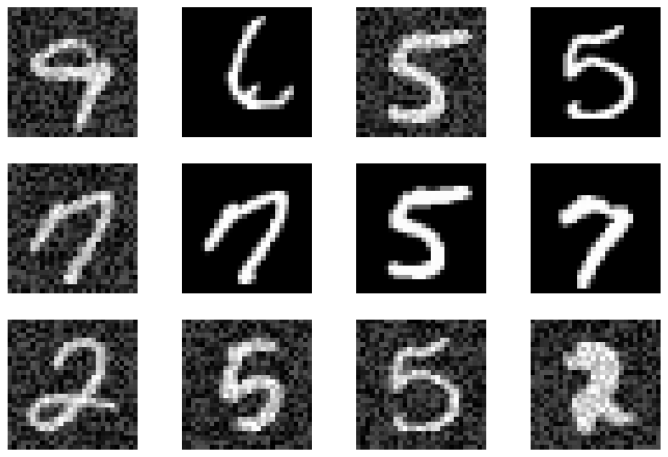

In [ ]:
# visualize the images

# get some sample data
train_loader,devset_loader,testdataset = makeTheDataset(12,True)

# pop out the data matrices
img = train_loader.dataset.tensors[0].detach()

# show the numbers
fig,ax = plt.subplots(3,4,figsize=(12,8))
for i,ax in enumerate(ax.flatten()):
  ax.imshow(np.reshape(img[i,:],(28,28)) ,cmap='gray')
  ax.axis('off')
plt.show()

In [ ]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  devsetAcc = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # devset accuracy
    X,y = next(iter(devset_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    devsetAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,devsetAcc,losses,net

In [ ]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,False)
  trainAcc,devsetAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(devsetAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()




  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,True)
  trainAcc,devsetAcc,losses,net          = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(devsetAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


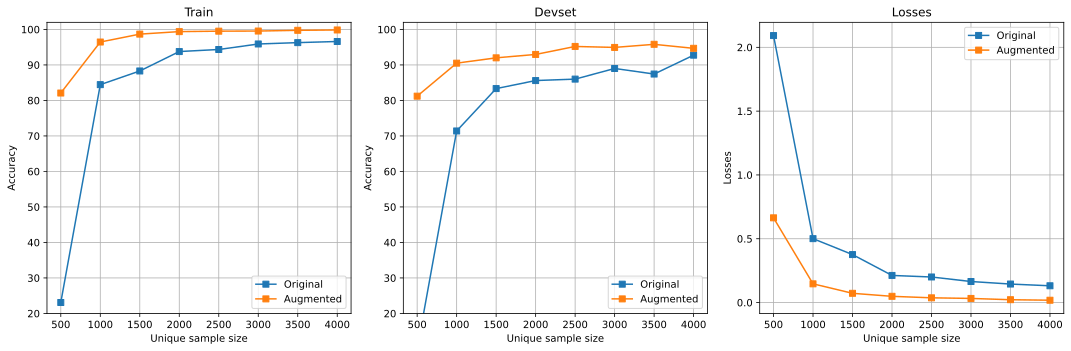

In [ ]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Augmented')

  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

In [ ]:
# we need to re-run the models for N=500

samplesize = 500

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,False)
trainAccO,devsetAccO,lossesO,netO       = function2trainTheModel() # O = original

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,True)
trainAccA,devsetAccA,lossesA,netA       = function2trainTheModel() # A = augmented

In [ ]:
# Now for the real test! On the test data!

# extract the test data
X,y = testdataset

# run the original model
yHat = netO(X)
testO = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# And the augmented model
yHat = netA(X)
testA = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# print the results!
print( f'ORIGINAL MODEL (N={samplesize}):\n  Train: {trainAccO[-1]:.2f}%, devset: {devsetAccO[-1]:.2f}%, test: {testO:.2f}%\n\n')
print(f'AUGMENTED MODEL (N={samplesize}):\n  Train: {trainAccA[-1]:.2f}%, devset: {devsetAccA[-1]:.2f}%, test: {testA:.2f}%')


ORIGINAL MODEL (N=500):
  Train: 39.09%, devset: 32.00%, test: 33.17%


AUGMENTED MODEL (N=500):
  Train: 93.11%, devset: 86.00%, test: 79.89%


FEATURE AUGMENTATION

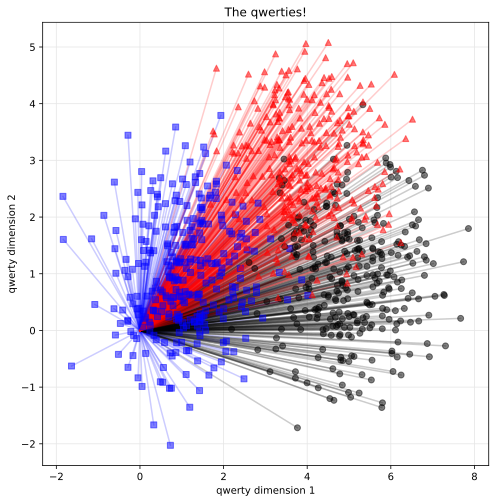

In [ ]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(8,8))
# draw distance to origin
color = 'bkr'
for i in range(len(data)):
  plt.plot([0,data[i,0]],[0,data[i,1]],color=color[labels[i]],alpha=.2)

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)

plt.grid(color=[.9,.9,.9])
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

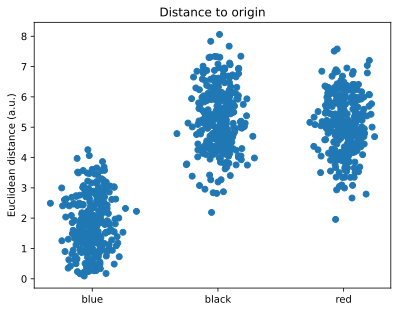

In [ ]:
# compute Euclidean distance to the origin
dist2orig = torch.sqrt( data[:,0]**2 + data[:,1]**2 )

plt.plot(labels+torch.randn(900)/10,dist2orig,'o')
plt.xticks([0,1,2],labels=['blue','black','red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()

In [ ]:
# And add that to the data matrix
dataAug = torch.cat((data,dist2orig.view(len(data),1)),axis=1)

# check data sizes
print(data.shape)
print(dataAug.shape)
print(' ')

# look at some of the data
print(dataAug)

torch.Size([900, 2])
torch.Size([900, 3])
 
tensor([[ 1.4288, -0.0248,  1.4290],
        [ 0.8412,  2.2874,  2.4372],
        [ 0.3859,  1.7498,  1.7919],
        ...,
        [ 3.9550,  4.4453,  5.9500],
        [ 3.3887,  2.3337,  4.1145],
        [ 3.2294,  4.2420,  5.3313]])


In [ ]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataAug, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
# create a class for the model
def createTheQwertyNet(useExtraFeature=False):

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      if useExtraFeature:
        self.input = nn.Linear(3,8)
      else:
        self.input = nn.Linear(2,8)

      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):

      # by request, only use XY features
      # print(x.shape) # comment out during training!
      if not useExtraFeature:
        x = x[:,:2]
      # print(x.shape) # comment out during training!

      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)

  # create the model instance
  net = qwertyNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# test the model

print('Using augmented feature:')
net = createTheQwertyNet(True)[0]
net(next(iter(train_loader))[0]);

print('\nNot using augmented feature:')
net = createTheQwertyNet(False)[0]
net(next(iter(train_loader))[0]);


Using augmented feature:

Not using augmented feature:


In [ ]:
# a function that trains the model

def function2trainTheModel(useExtraFeature=False):

  # number of epochs
  numepochs = 200

  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(useExtraFeature)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

In [ ]:
#
def plotTheResults():

  # compute accuracy over entire dataset (train+test)
  yHat = net(dataAug)
  predictions = torch.argmax(yHat,axis=1)
  accuracy = (predictions == labels).float()

  # and accuracy by group
  accuracyByGroup = np.zeros(3)
  for i in range(3):
    accuracyByGroup[i] = 100*torch.mean(accuracy[labels==i])


  # create the figure
  fig,ax = plt.subplots(2,2,figsize=(10,6))

  # plot the loss function
  ax[0,0].plot(losses.detach())
  ax[0,0].set_ylabel('Loss')
  ax[0,0].set_xlabel('epoch')
  ax[0,0].set_title('Losses')

  # plot the accuracy functions
  ax[0,1].plot(trainAcc,label='Train')
  ax[0,1].plot(testAcc,label='Test')
  ax[0,1].set_ylabel('Accuracy (%)')
  ax[0,1].set_xlabel('Epoch')
  ax[0,1].set_title('Accuracy')
  ax[0,1].legend()

  # plot overall accuracy by group
  ax[1,0].bar(range(3),accuracyByGroup)
  ax[1,0].set_ylim([np.min(accuracyByGroup)-5,np.max(accuracyByGroup)+5])
  ax[1,0].set_xticks([0,1,2])
  ax[1,0].set_xlabel('Group')
  ax[1,0].set_ylabel('Accuracy (%)')
  ax[1,0].set_title('Accuracy by group')

  # scatterplot of correct and incorrect labeled data
  colorShapes = [ 'bs','ko','g^' ] # data markers
  for i in range(3):
    # plot all data points
    ax[1,1].plot(dataAug[labels==i,0],dataAug[labels==i,1],colorShapes[i],
                 alpha=.3,label=f'Group {i}')

    # cross-out the incorrect ones
    idxErr = (accuracy==0) & (labels==i)
    ax[1,1].plot(dataAug[idxErr,0],dataAug[idxErr,1],'rx')

  ax[1,1].set_title('All groups')
  ax[1,1].set_xlabel('qwerty dimension 1')
  ax[1,1].set_ylabel('qwerty dimension 2')
  ax[1,1].legend()

  plt.tight_layout()
  plt.show()

Final accuracy: 87.78%


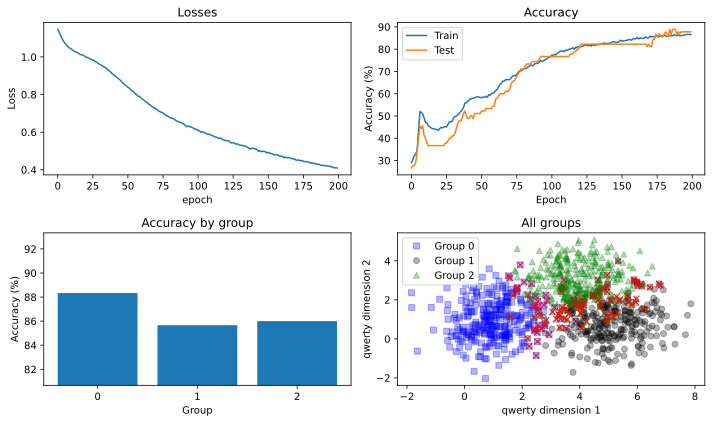

In [ ]:
# run the model and visualize the results
trainAcc,testAcc,losses,net = function2trainTheModel(False)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()

Final accuracy: 90.00%


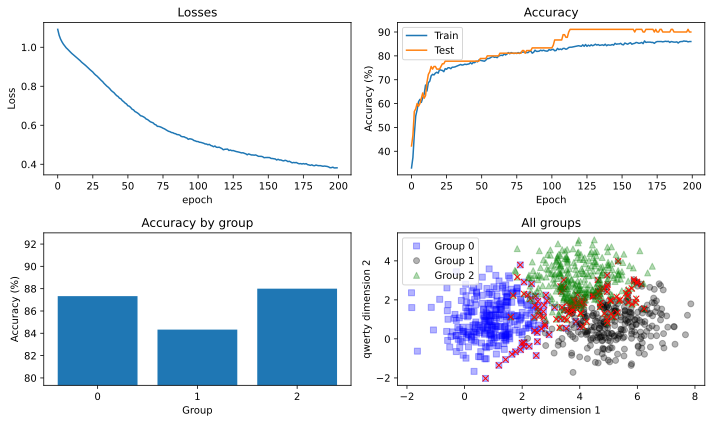

In [ ]:
# run the model and visualize the results
trainAcc,testAcc,losses,net = function2trainTheModel(True)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()

In [ ]:
# Run the experiment multiple times and do a t-test!
# (takes ~3 mins)

finalacc2 = np.zeros(10)
finalacc3 = np.zeros(10)

for i in range(10):
  finalacc2[i] = function2trainTheModel(False)[1][-1]
  finalacc3[i] = function2trainTheModel(True)[1][-1]

# show the numbers
print( np.round(np.vstack((finalacc2,finalacc3)).T,2) )

# run the t-test and print the results
from scipy import stats
t,p = stats.ttest_ind(finalacc3,finalacc2)
print('\n\nt=%.2f, p=%.2f' %(t,p))

[[90.   87.78]
 [91.11 85.56]
 [88.89 76.67]
 [92.22 87.78]
 [85.56 88.89]
 [88.89 90.  ]
 [85.56 92.22]
 [86.67 75.56]
 [87.78 81.11]
 [86.67 85.56]]


t=-1.68, p=0.11


GETTING DATA ON COLAB FRON (OTHER PLACES)

In [ ]:
# FROM TORCH VISION

import torchvision

# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

In [ ]:
# Datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [ ]:
# FROM WEB

# url
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'

# import directly into pandas
data = pd.read_excel(marriage_url,header=5)
data

In [ ]:
# FROM HARD DRIVE
# NOT RECOMENDED TAKES TIME

from google.colab import files
uploaded = files.upload()

In [ ]:
#FROM G.DRIVE

from google.colab import drive
drive.mount('/content/gdrive')

LOADING AND SAVING DATA

In [ ]:
# net IS THE VARIABLE WHILE RUNNING AND SHOWING MODEL RESULT
trainAcc,testAcc,losses,net = function2trainTheModel()

In [ ]:
# save the model
torch.save(net.state_dict(),'trainedModel.pt')

In [ ]:
# LOAD IN MODEL IN DIFFERENT NAME

# create two new models of the same class
model1 = createTheMNISTNet()[0]
model2 = createTheMNISTNet()[0]

# replace one model's parameters with those of the trained net
model1.load_state_dict(torch.load('trainedModel.pt'))

In [ ]:
# SHOWING MODELS ARE SAME(DATA NOT WRIITEN JUST EXAMPLE)

# get some data from the test loader
X,y = next(iter(test_loader))

# run the data through both models
yHatNet    = net(X)
yHatModel1 = model1(X)
yHatModel2 = model2(X)


# show that the results overlap
fig = plt.figure(figsize=(12,5))
plt.plot(yHatNet[:,5].detach(),'b',label='Original')
plt.plot(yHatModel1[:,5].detach(),'ro',label='Loaded')
plt.plot(yHatModel2[:,5].detach(),'mx',label='Not loaded')
plt.legend()
plt.xlabel('Stimulus index')
plt.ylabel('Model output for node "6"')
plt.xlim([1000,1100])

plt.show()

SAVING BEST MODEL

In [ ]:
# SAVING BEST MODEL WITH SAME PARAMETERS
# DOESN'T MEAN IT WILL PERFORM BEST IN TEST SET
# SECTING BEST MODEL FROM DEV SET FROM LOOPS CALLED RESERCHER OVERFITTING

In [ ]:
# random number only
theBest = [0,0]

for i in range(10):

  # "train the model"
  accuracy = np.random.rand()

  # see if this is better than any previous runs
  if accuracy>theBest[0]:
    theBest = [accuracy,i]


print(f'Highest "accuracy" was {100*theBest[0]:.2f}% in run {theBest[1]+1}.')

Highest "accuracy" was 99.13% in run 4.


In [ ]:
# shown through example

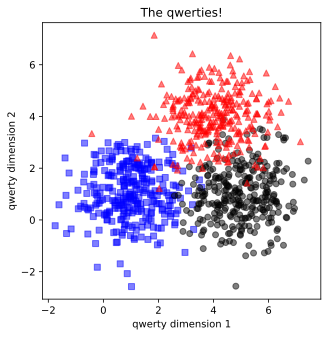

In [ ]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 4 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# specify sizes of the partitions
# order is train,devset,test
partitions = [3*nPerClust-400,200,200]

# split the data
train_data,devtest_data, train_labels,devtest_labels = train_test_split(data, labels, train_size=partitions[0])

# now split the devtest data
dev_data,test_data, dev_labels,test_labels = train_test_split(devtest_data, devtest_labels, train_size=partitions[1])


# print out the sizes
print('   Total data size: ' + str(data.shape) + '\n')
print('Training data size: ' + str(train_data.shape))
print('  Devset data size: ' + str(dev_data.shape))
print('    Test data size: ' + str(test_data.shape))

   Total data size: torch.Size([900, 2])

Training data size: torch.Size([500, 2])
  Devset data size: torch.Size([200, 2])
    Test data size: torch.Size([200, 2])


In [ ]:
# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
dev_data   = TensorDataset(dev_data,dev_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 30
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
dev_loader   = DataLoader(dev_data,batch_size=dev_data.tensors[0].shape[0])
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
# create a class for the model
def createTheQwertyNet():

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,8)

      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)

  # create the model instance
  net = qwertyNet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer


In [ ]:
def function2trainTheModel():

  # New! initialize a dictionary for the best model
  theBestModel = {'Accuracy':0, 'net':None}


  # number of epochs
  numepochs = 100

  # create a new model
  net,lossfun,optimizer = createTheQwertyNet()

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  devAcc   = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(dev_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    devAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )


    # New! Store this model if it's the best so far
    if devAcc[-1]>theBestModel['Accuracy']:

      # new best accuracy
      theBestModel['Accuracy'] = devAcc[-1].item()

      # model's internal state
      theBestModel['net'] = copy.deepcopy( net.state_dict() )

  # end epochs

  # function output
  return trainAcc,devAcc,losses,theBestModel


In [ ]:
# run the model
trainAcc,devAcc,losses,theBestModel = function2trainTheModel()

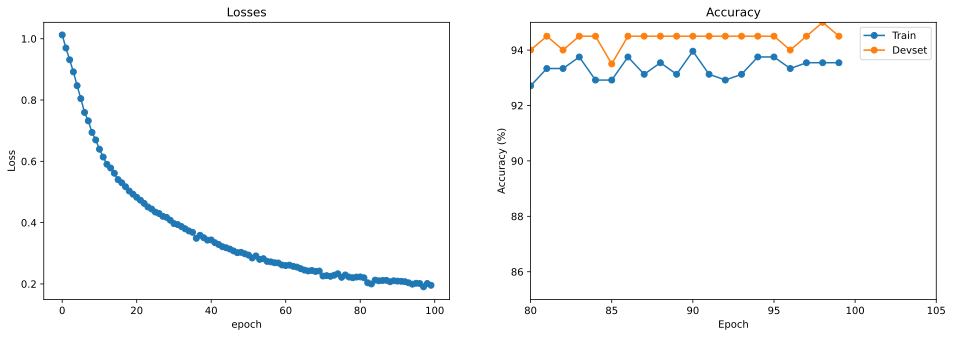

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses.detach(),'o-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,'o-',label='Train')
ax[1].plot(devAcc,'o-',label='Devset')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].set_ylim([85,95])
ax[1].set_xlim([80,105])
ax[1].legend()
plt.show()

In [ ]:
# extract X,y from test dataloader
X,y = next(iter(test_loader))

# yHat = theBestModel['net'](X)

In [ ]:
# recreate the best-performing model
bestnet = createTheQwertyNet()[0]
bestnet.load_state_dict(theBestModel['net'])


<All keys matched successfully>

In [ ]:
# and run the data through TEST
X,y = next(iter(test_loader))
yHat = bestnet(X)

bestAcc = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())
bestAcc

tensor(88.)

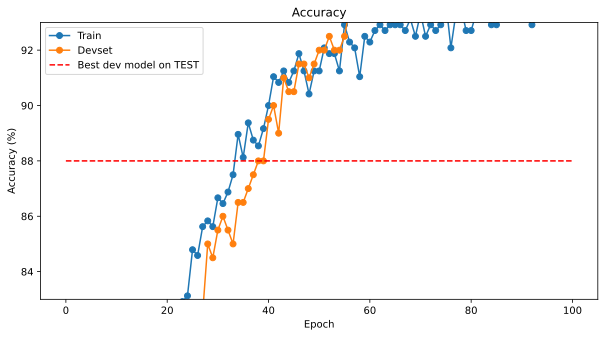

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'o-',label='Train')
plt.plot(devAcc,'o-',label='Devset')
plt.plot([0,len(devAcc)],[bestAcc,bestAcc],'r--',label='Best dev model on TEST')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.ylim([bestAcc-5,bestAcc+5])

plt.legend()
plt.show()